In [3]:
import pandas as pd

#load the dataset
df = pd.read_csv("IEA Global EV Data 2024.csv")

#check structure
print(df.shape)
print(df.columns)
print(df.head())

(12654, 8)
Index(['region', 'category', 'parameter', 'mode', 'powertrain', 'year', 'unit',
       'value'],
      dtype='object')
      region    category       parameter  mode powertrain  year      unit  \
0  Australia  Historical  EV stock share  Cars         EV  2011   percent   
1  Australia  Historical  EV sales share  Cars         EV  2011   percent   
2  Australia  Historical        EV sales  Cars        BEV  2011  Vehicles   
3  Australia  Historical        EV stock  Cars        BEV  2011  Vehicles   
4  Australia  Historical        EV stock  Cars        BEV  2012  Vehicles   

       value  
0    0.00039  
1    0.00650  
2   49.00000  
3   49.00000  
4  220.00000  


In [5]:
print(df.isnull().sum())
print(df.duplicated().sum())

region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64
0


In [7]:
import pandas as pd

#re-load the dataset
df = pd.read_csv("IEA Global EV Data 2024.csv")

# Check the first few rows
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [9]:
# Filter for EV stock and sales (vehicles only)
ev_data = df[
    (df["parameter"].isin(["EV stock", "EV sales"])) &
    (df["unit"] == "Vehicles")
]

# Group and aggregate total values by year and parameter
grouped = ev_data.groupby(["year", "parameter"])["value"].sum().reset_index()

# Pivot so we get columns for EV stock and EV sales
global_trend = grouped.pivot(index="year", columns="parameter", values="value").fillna(0)

# Display the trend table
print(global_trend.head())

parameter    EV sales   EV stock
year                            
2010        26064.000    99178.0
2011       130608.000   228130.0
2012       324612.500   552399.0
2013       553557.701  1095915.0
2014       868080.200  1957261.2


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Paschaline\\OneDrive\\images\\bev_vs_phev_trend.png'

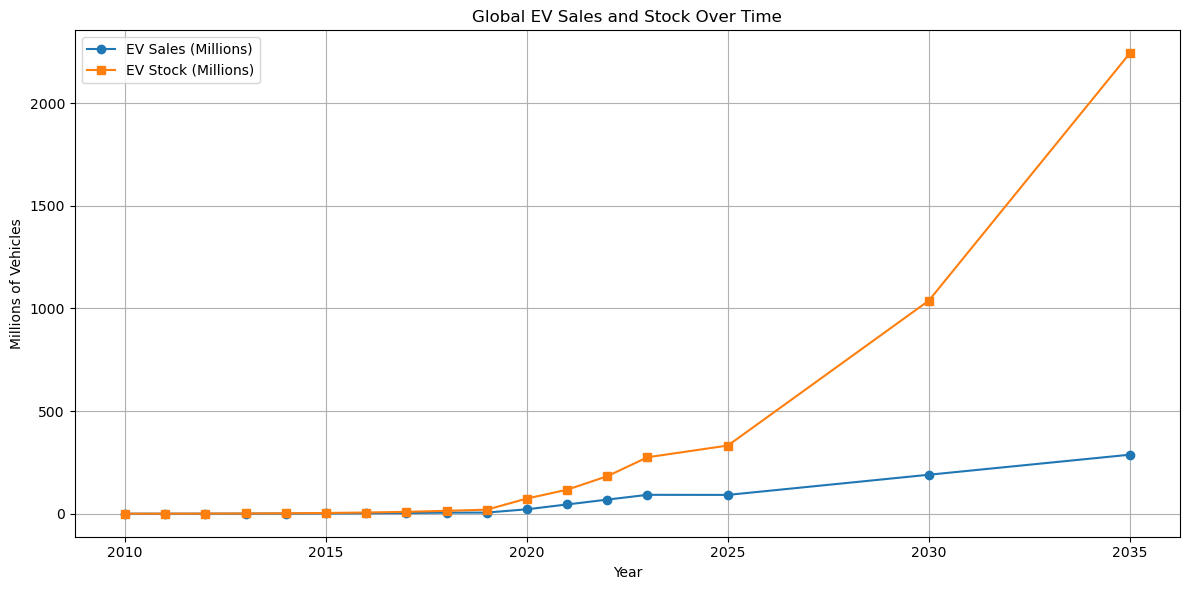

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(global_trend.index, global_trend["EV sales"] / 1e6, label="EV Sales (Millions)", marker='o')
plt.plot(global_trend.index, global_trend["EV stock"] / 1e6, label="EV Stock (Millions)", marker='s')
plt.title("Global EV Sales and Stock Over Time")
plt.xlabel("Year")
plt.ylabel("Millions of Vehicles")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig('../images/bev_vs_phev_trend.png', dpi=300, bbox_inches='tight')

plt.show()

In [103]:
# Filter dataset for EV stock and EV sales (only vehicles)
ev_data = df[
    (df["parameter"].isin(["EV stock", "EV sales"])) &
    (df["unit"] == "Vehicles")
]

In [105]:
# Group by region and parameter to get total EV stock and sales per region
region_totals = ev_data.groupby(["region", "parameter"])["value"].sum().reset_index()

# Pivot so parameters become columns (EV stock, EV sales)
region_pivot = region_totals.pivot(index="region", columns="parameter", values="value").fillna(0)

# Sort by EV stock in descending order
region_sorted = region_pivot.sort_values(by="EV stock", ascending=False)

# Show top 10 regions
print(region_sorted.head(10))

parameter             EV sales      EV stock
region                                      
World              397584449.0  2.122536e+09
China              173375628.0  9.746760e+08
Europe              94939403.0  4.988360e+08
USA                 62714548.2  3.485656e+08
Rest of the world   53001585.0  2.559952e+08
India               11179396.9  5.223938e+07
EU27                 8944714.0  2.429784e+07
Germany              3012826.0  7.188281e+06
France               1666650.0  5.121122e+06
United Kingdom       1659853.0  4.623784e+06


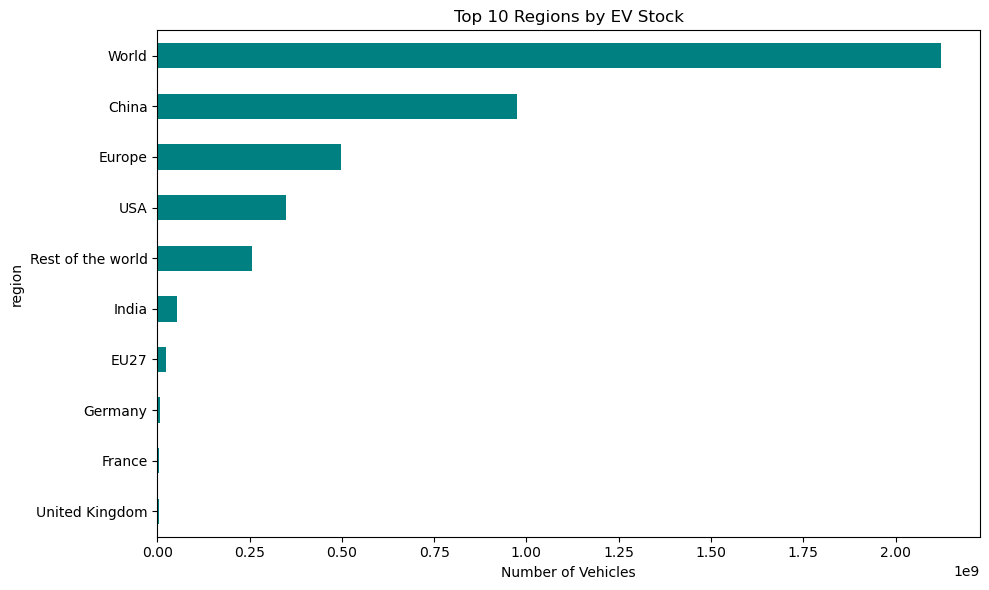

In [109]:
# Optional: Quick bar chart of top 10 EV stock regions
top_regions = region_sorted.head(10)

top_regions["EV stock"].plot(kind="barh", figsize=(10, 6), color="teal")
plt.title("Top 10 Regions by EV Stock")
plt.xlabel("Number of Vehicles")
plt.gca().invert_yaxis()  # Highest on top
plt.tight_layout()
plt.savefig('../images', dpi=300, bbox_inches='tight')
plt.show()

In [111]:
# Filter only EV stock/sales in vehicles and BEV/PHEV types
powertrain_data = df[
    (df["parameter"].isin(["EV stock", "EV sales"])) &
    (df["unit"] == "Vehicles") &
    (df["powertrain"].isin(["BEV", "PHEV"]))
]

In [113]:
# Group by year, powertrain, and parameter (stock/sales), then sum the values
pt_grouped = powertrain_data.groupby(["year", "powertrain", "parameter"])["value"].sum().reset_index()

In [115]:
# Pivot to get EV stock and EV sales as separate columns per powertrain
pt_pivot = pt_grouped.pivot_table(index=["year", "parameter"], columns="powertrain", values="value").fillna(0)

# Check the structure
print(pt_pivot.head(10))

powertrain              BEV      PHEV
year parameter                       
2010 EV sales     24852.000    1103.0
     EV stock     97247.000    1746.0
2011 EV sales    111340.000   19116.0
     EV stock    206543.000   21265.0
2012 EV sales    184853.500  139641.0
     EV stock    391398.000  160558.0
2013 EV sales    317584.701  235744.0
     EV stock    698916.000  396396.0
2014 EV sales    535285.000  332447.0
     EV stock   1216581.000  739799.0


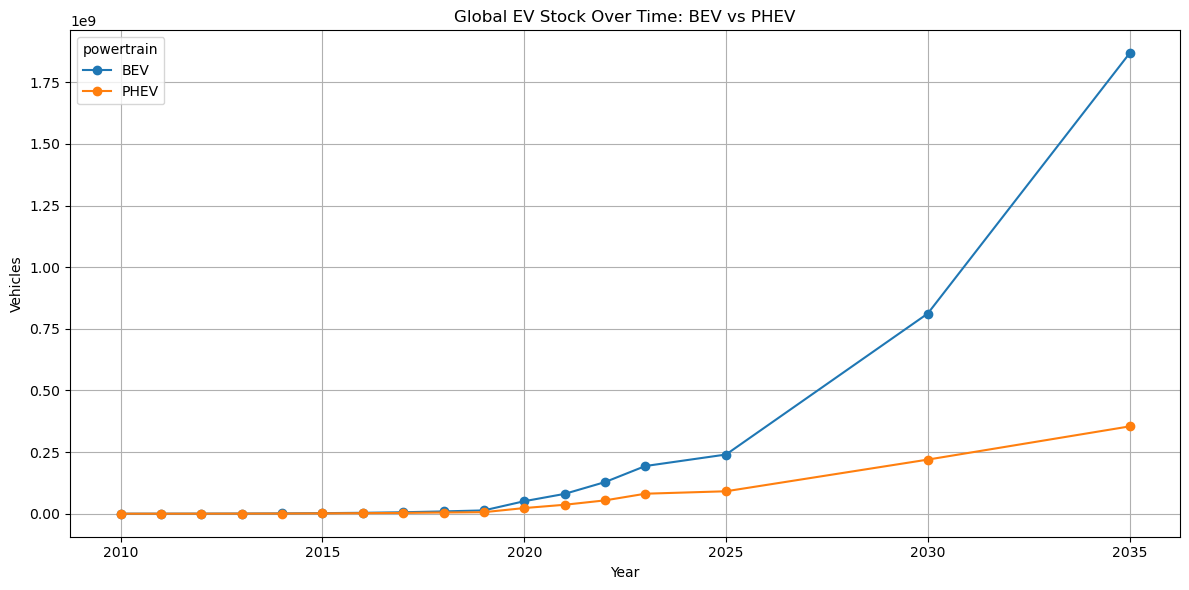

In [117]:
# Reset the multi-index to flat columns
pt_flat = pt_pivot.reset_index()

# Filter only stock data
stock_data = pt_flat[pt_flat["parameter"] == "EV stock"]

# Plot BEV vs PHEV stock
stock_data.plot(x="year", y=["BEV", "PHEV"], kind="line", marker='o', figsize=(12, 6),
                title="Global EV Stock Over Time: BEV vs PHEV")
plt.xlabel("Year")
plt.ylabel("Vehicles")
plt.grid(True)
plt.tight_layout()
plt.savefig('../images', dpi=300, bbox_inches='tight')
plt.show()

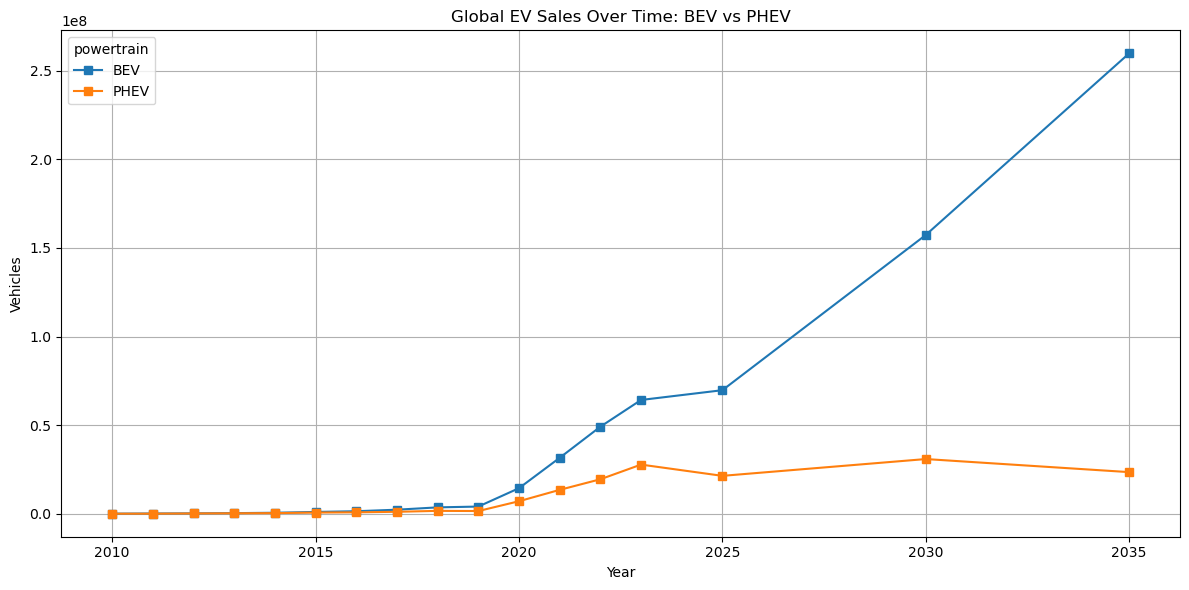

In [65]:
sales_data = pt_flat[pt_flat["parameter"] == "EV sales"]

sales_data.plot(x="year", y=["BEV", "PHEV"], kind="line", marker='s', figsize=(12, 6),
                title="Global EV Sales Over Time: BEV vs PHEV")
plt.xlabel("Year")
plt.ylabel("Vehicles")
plt.grid(True)
plt.tight_layout()
plt.show()

In [119]:
#EV Trends by Mode of Transport

# Focus on EV stock/sales (vehicle-level only)
mode_data = df[
    (df["parameter"].isin(["EV stock", "EV sales"])) &
    (df["unit"] == "Vehicles")
]

In [121]:
# Group by year, mode, and parameter (e.g., EV stock or sales)
mode_grouped = mode_data.groupby(["year", "mode", "parameter"])["value"].sum().reset_index()

In [123]:
# Pivot to have modes as columns, separate by parameter
mode_pivot = mode_grouped.pivot_table(index=["year", "parameter"], columns="mode", values="value").fillna(0)

# Flatten index for easier filtering
mode_pivot_reset = mode_pivot.reset_index()

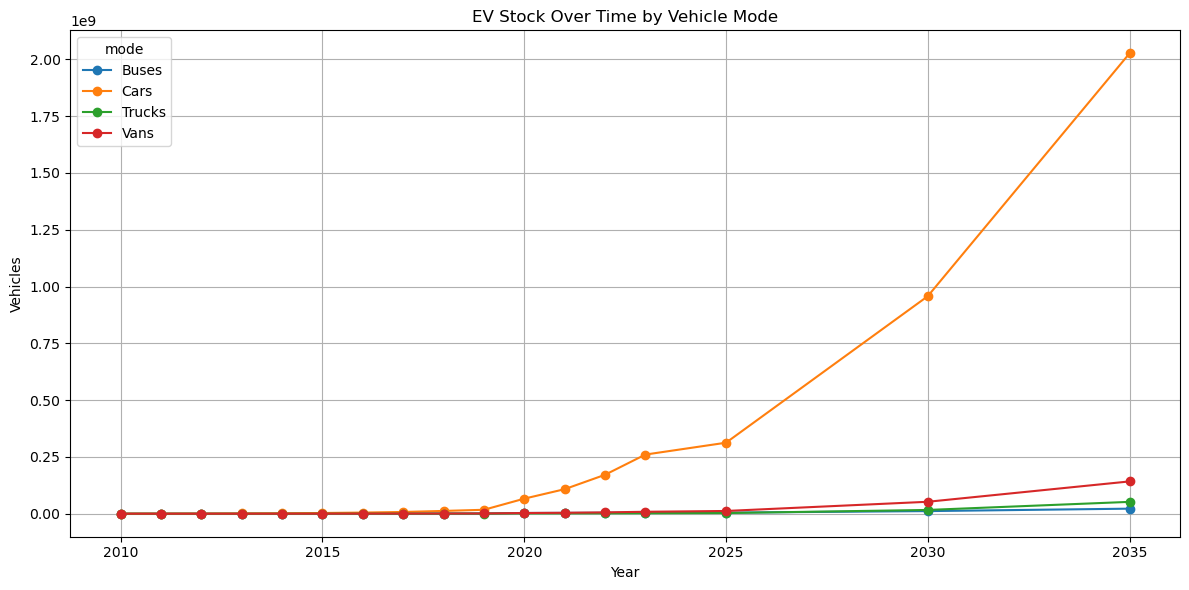

In [125]:
#plot stock trends for different modes
# Filter only EV stock
ev_stock_by_mode = mode_pivot_reset[mode_pivot_reset["parameter"] == "EV stock"]

# Plot
ev_stock_by_mode.plot(x="year", y=ev_stock_by_mode.columns[2:], kind="line", marker='o',
                      figsize=(12, 6), title="EV Stock Over Time by Vehicle Mode")
plt.xlabel("Year")
plt.ylabel("Vehicles")
plt.grid(True)
plt.tight_layout()
plt.show()

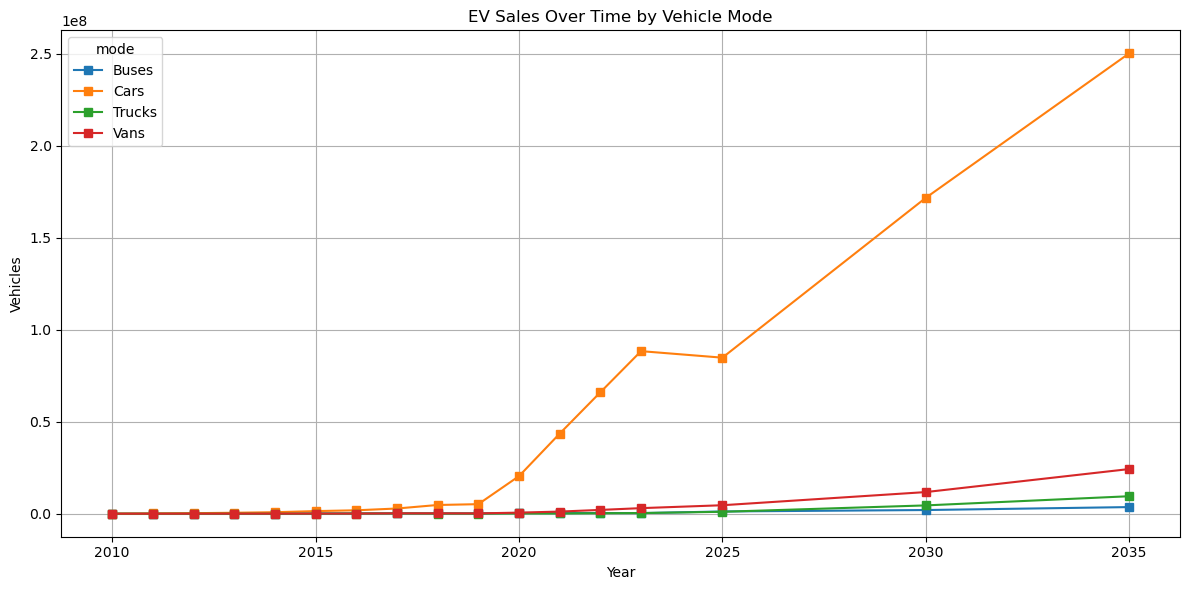

In [127]:
#plot EV sales by modes
ev_sales_by_mode = mode_pivot_reset[mode_pivot_reset["parameter"] == "EV sales"]

ev_sales_by_mode.plot(x="year", y=ev_sales_by_mode.columns[2:], kind="line", marker='s',
                      figsize=(12, 6), title="EV Sales Over Time by Vehicle Mode")
plt.xlabel("Year")
plt.ylabel("Vehicles")
plt.grid(True)
plt.tight_layout()
plt.savefig('../images', dpi=300, bbox_inches='tight')
plt.show()

In [129]:
#Regional trends by mode
# Filter only EV stock and sales (vehicles only)
region_mode_data = df[
    (df["parameter"].isin(["EV stock", "EV sales"])) &
    (df["unit"] == "Vehicles")
]

In [131]:
# Group and sum values
region_mode_grouped = region_mode_data.groupby(["region", "mode", "parameter"])["value"].sum().reset_index()

In [133]:
# Pivot so that modes become columns
region_mode_pivot = region_mode_grouped.pivot_table(
    index=["region", "parameter"],
    columns="mode",
    values="value"
).fillna(0)

# Reset for easy filtering
region_mode_flat = region_mode_pivot.reset_index()

C:\Users\Paschaline\AppData\Local\Temp\ipykernel_9332\2731813508.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_by_mode["total"] = stock_by_mode.drop(columns=["parameter", "region"]).sum(axis=1)


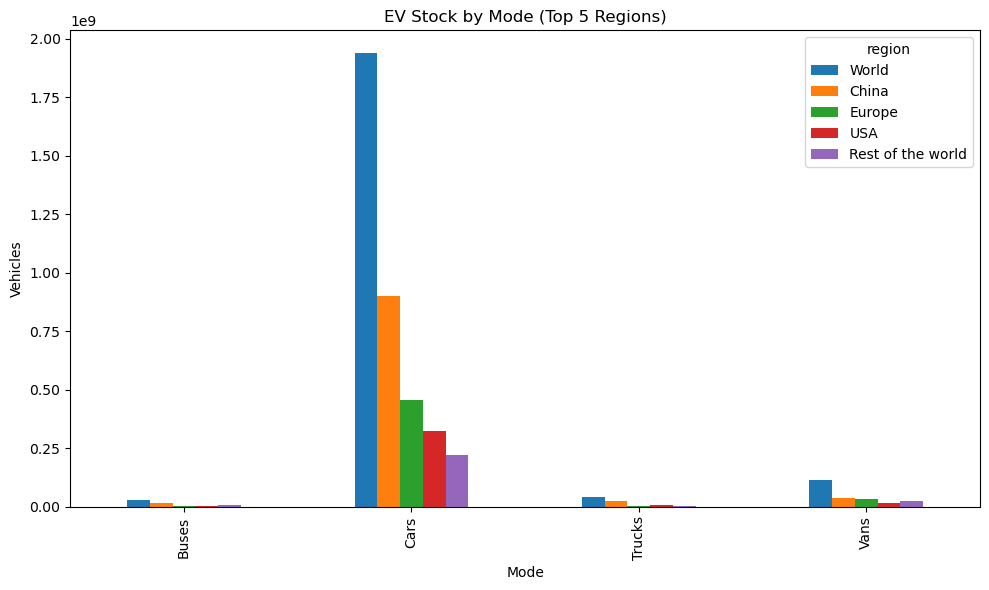

In [135]:
#plot example; EV stock by mode(top 5 regions)
# Filter for EV stock
stock_by_mode = region_mode_flat[region_mode_flat["parameter"] == "EV stock"]

# Sort by total vehicles (all modes summed)
stock_by_mode["total"] = stock_by_mode.drop(columns=["parameter", "region"]).sum(axis=1)
top5_regions = stock_by_mode.sort_values(by="total", ascending=False).head(5)

# Plot modes by region
top5_regions.set_index("region").drop(columns=["parameter", "total"]).T.plot(kind="bar", figsize=(10,6))
plt.title("EV Stock by Mode (Top 5 Regions)")
plt.ylabel("Vehicles")
plt.xlabel("Mode")
plt.tight_layout()
plt.savefig('../images', dpi=300, bbox_inches='tight')
plt.show()

In [137]:
#filter BEV and PHEV data
mode_pt_data = df[
    (df["parameter"].isin(["EV stock", "EV sales"])) &
    (df["unit"] == "Vehicles") &
    (df["powertrain"].isin(["BEV", "PHEV"]))
]

In [139]:
#group by mode, powertrain, and parameter
mode_pt_grouped = mode_pt_data.groupby(["mode", "powertrain", "parameter"])["value"].sum().reset_index()

In [141]:
#PIVOT
mode_pt_pivot = mode_pt_grouped.pivot_table(
    index=["mode", "parameter"],
    columns="powertrain",
    values="value"
).fillna(0).reset_index()

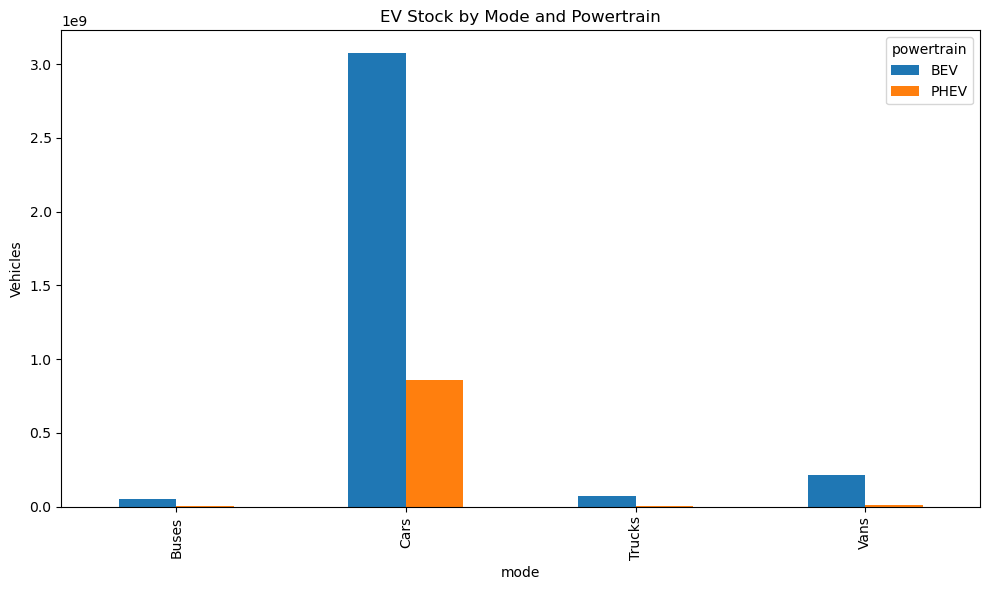

In [143]:
#Plot BEV vs PHEV stock by mode
stock_mode_pt = mode_pt_pivot[mode_pt_pivot["parameter"] == "EV stock"]

# Bar plot
stock_mode_pt.set_index("mode")[["BEV", "PHEV"]].plot(kind="bar", figsize=(10,6), title="EV Stock by Mode and Powertrain")
plt.ylabel("Vehicles")
plt.tight_layout()
plt.savefig('../images', dpi=300, bbox_inches='tight')
plt.show()

In [145]:
#Global EV Stock Over Time

# Filter only EV stock and Vehicles unit
global_stock = df[
    (df["parameter"] == "EV stock") &
    (df["unit"] == "Vehicles")
]

# Group by year and sum across all regions/modes
stock_by_year = global_stock.groupby("year")["value"].sum().reset_index()
stock_by_year.columns = ["year", "total_ev_stock"]

stock_by_year.head()

,year,total_ev_stock
0,2010,99178.0
1,2011,228130.0
2,2012,552399.0
3,2013,1095915.0
4,2014,1957261.2


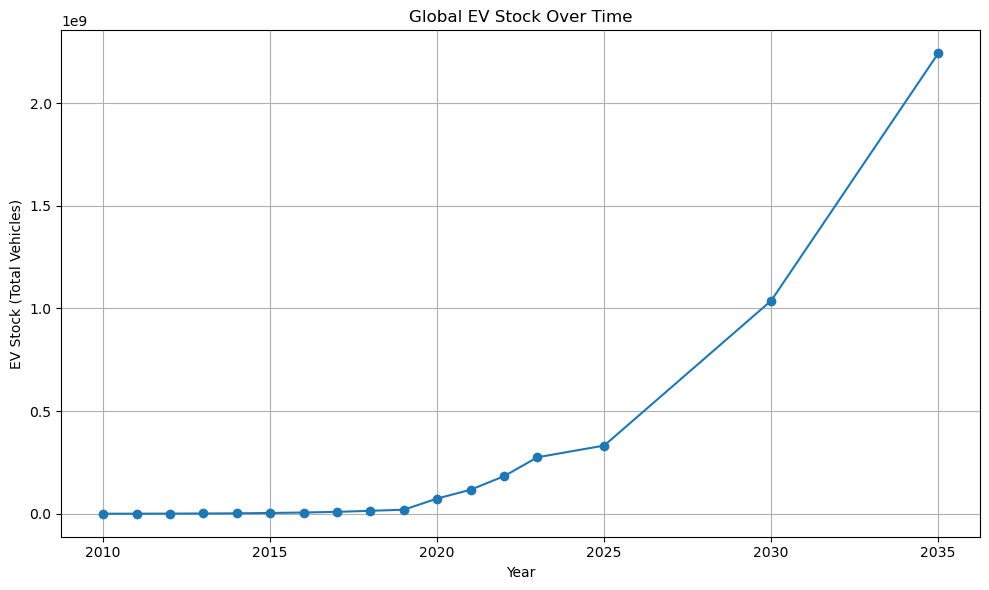

In [147]:
#Plot Global EV Growth Trend
plt.figure(figsize=(10,6))
plt.plot(stock_by_year["year"], stock_by_year["total_ev_stock"], marker='o')
plt.title("Global EV Stock Over Time")
plt.xlabel("Year")
plt.ylabel("EV Stock (Total Vehicles)")
plt.grid(True)
plt.tight_layout()
plt.savefig('../images', dpi=300, bbox_inches='tight')
plt.show()

In [149]:
#Forecasting future EV stock(3-5years ahead)

from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare X and y
X = stock_by_year["year"].values.reshape(-1, 1)
y = stock_by_year["total_ev_stock"].values

# Fit model
model = LinearRegression()
model.fit(X, y)

# Predict next 5 years
future_years = np.arange(stock_by_year["year"].max() + 1, stock_by_year["year"].max() + 6).reshape(-1, 1)
future_preds = model.predict(future_years)

# Combine with original data
forecast_df = pd.DataFrame({
    "year": future_years.flatten(),
    "predicted_ev_stock": future_preds.astype(int)
})

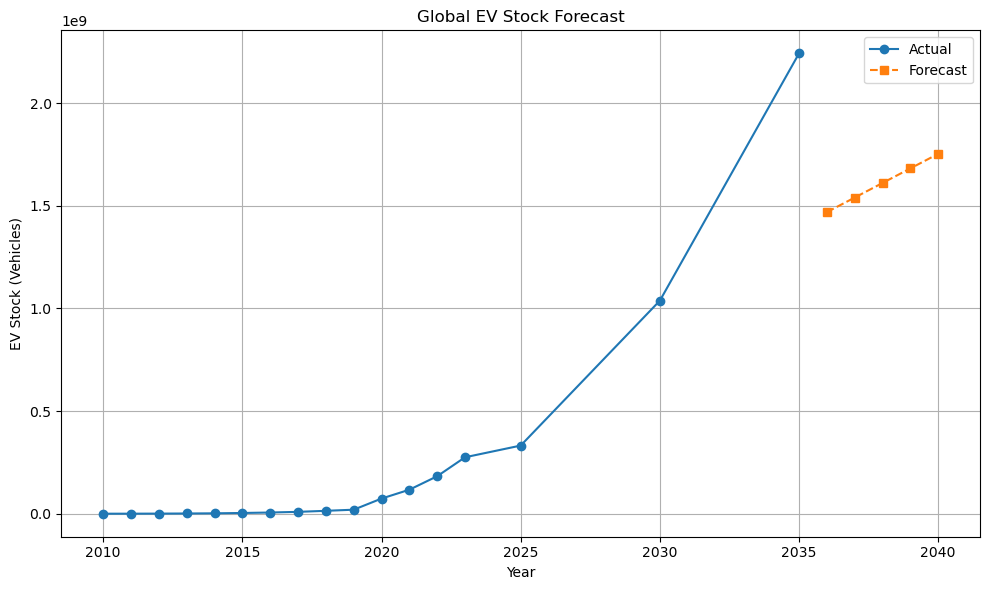

In [151]:
#Plot actual+Forecast

plt.figure(figsize=(10,6))
plt.plot(stock_by_year["year"], stock_by_year["total_ev_stock"], label="Actual", marker='o')
plt.plot(forecast_df["year"], forecast_df["predicted_ev_stock"], label="Forecast", marker='s', linestyle='--')
plt.title("Global EV Stock Forecast")
plt.xlabel("Year")
plt.ylabel("EV Stock (Vehicles)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('../images', dpi=300, bbox_inches='tight')
plt.show()

In [153]:
#Year-over-year-growth rate
stock_by_year["YoY Growth (%)"] = stock_by_year["total_ev_stock"].pct_change() * 100

In [155]:
# Use the same stock_by_year from before
# Filter out zero or missing values (to avoid log(0))
stock_data = stock_by_year[stock_by_year["total_ev_stock"] > 0].copy()

# Log-transform the EV stock
stock_data["log_stock"] = np.log(stock_data["total_ev_stock"])

In [157]:
#fit linear regression on log-transformed stock
# Prepare X and y
X_exp = stock_data["year"].values.reshape(-1, 1)
y_log = stock_data["log_stock"].values

# Fit linear regression
exp_model = LinearRegression()
exp_model.fit(X_exp, y_log)

LinearRegression()

In [159]:
# Forecast years (next 5 years)
future_years_exp = np.arange(stock_data["year"].max() + 1, stock_data["year"].max() + 6).reshape(-1, 1)

# Predict log(EV stock), then exponentiate
log_preds = exp_model.predict(future_years_exp)
exp_preds = np.exp(log_preds)  # convert back to original scale

# Build forecast DataFrame
exp_forecast_df = pd.DataFrame({
    "year": future_years_exp.flatten(),
    "predicted_ev_stock_exp": exp_preds.astype(int)
})

C:\Users\Paschaline\AppData\Local\Temp\ipykernel_9332\2267326196.py:11: RuntimeWarning: invalid value encountered in cast
  "predicted_ev_stock_exp": exp_preds.astype(int)


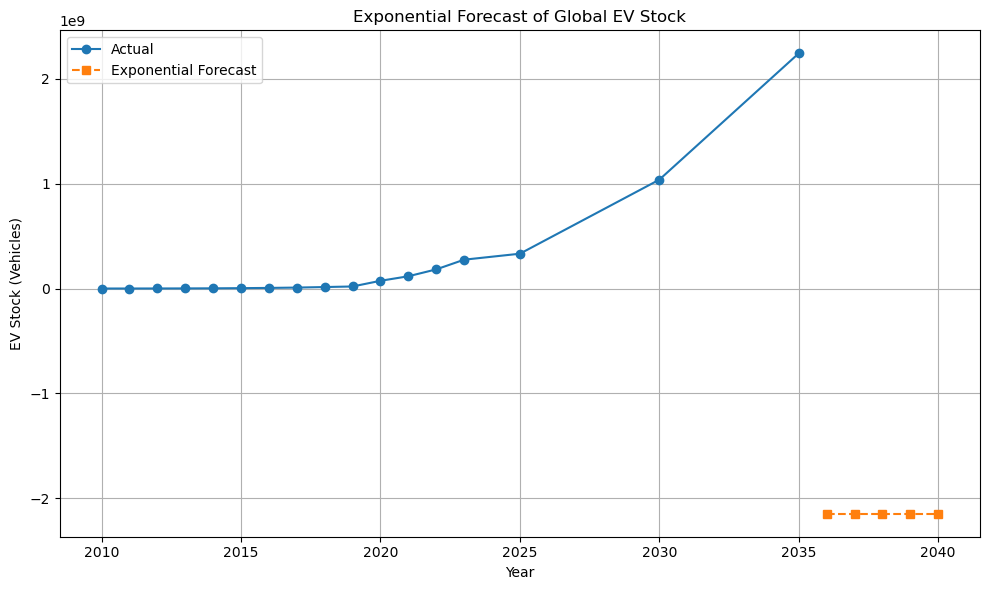

In [161]:
#plot actual vs expononetial forecast

plt.figure(figsize=(10,6))
plt.plot(stock_data["year"], stock_data["total_ev_stock"], label="Actual", marker='o')
plt.plot(exp_forecast_df["year"], exp_forecast_df["predicted_ev_stock_exp"], label="Exponential Forecast", linestyle='--', marker='s')
plt.title("Exponential Forecast of Global EV Stock")
plt.xlabel("Year")
plt.ylabel("EV Stock (Vehicles)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('../images', dpi=300, bbox_inches='tight')
plt.show()

In [163]:
#Comparing linear and exponential 

# Merge linear and exponential forecasts
combined = forecast_df.merge(exp_forecast_df, on="year")

print(combined)

   year  predicted_ev_stock  predicted_ev_stock_exp
0  2036          1469456872             -2147483648
1  2037          1540462854             -2147483648
2  2038          1611468835             -2147483648
3  2039          1682474816             -2147483648
4  2040          1753480797             -2147483648
